In [1]:
import networkx as nx
G = nx.Graph()

根据定义，a Graph是节点（顶点）的集合以及标识的节点对（称为边，链接等）。在NetworkX中，节点可以是任何可清除对象，例如文本字符串，图像，XML对象，另一个图形，自定义节点对象等。

Python的None对象不应该用作节点，因为它确定是否在许多函数中分配了可选的函数参数。

## 节点
该图G可以以多种方式增长。NetworkX包含许多图形生成器功能和工具，可以以多种格式读写图形。为了开始，我们将看看简单的操作。您可以一次添加一个节点

In [2]:
G.add_node(1)
G.add_nodes_from([2, 3])

In [3]:
H = nx.path_graph(10)
G.add_nodes_from(H)
list(G.nodes)

[1, 2, 3, 0, 4, 5, 6, 7, 8, 9]

In [4]:
list(G.edges)

[]

In [5]:
list(G.adj[1])  # or list(G.neighbors(1))

[]

In [15]:
G.clear()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

print(G.number_of_nodes())
print(G.number_of_edges())

8
3


我们可以检查节点和边缘。四个基本图形性能推动报告：G.nodes，G.edges，G.adj和G.degree。这些是图中节点，边，邻居（邻接）和节点度的类似集合的视图。它们为图形结构提供了不断更新的只读视图。他们还字典般在通过意见你可以看一下节点和边缘数据属性和使用迭代方法与数据属性.items()，.data('span')。如果您想要特定容器类型而不是视图，则可以指定一个。这里我们使用列表，虽然集合，dicts，元组和其他容器在其他上下文中可能更好。

In [7]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [8]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [9]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [10]:
G.degree[1]  # the number of edges incident to 1

2

In [11]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [12]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

In [16]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)
list(G.nodes)

[1, 3, 'spam']

In [17]:
G.add_edge(1, 2)
H = nx.DiGraph(G)   # create a DiGraph using the connections from G
print(list(H.edges()))
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
print(list(H.edges()))

[(1, 2), (2, 1)]
[(0, 1), (1, 2), (2, 3)]


## 什么用作节点和边缘
您可能会注意到节点和边缘未指定为NetworkX对象。这使您可以自由地将有意义的项目用作节点和边缘。最常见的选择是数字或字符串，但节点可以是任何可清除对象（除外None），并且边可以与任何对象关联x使用。G.add_edge(n1, n2, object=x)

作为一个例子，n1并且n2可以从RCSB蛋白质数据银行蛋白质的对象，并x可能指出版物，详细说明它们之间的相互作用的实验观测的XML记录。

我们发现这种功能非常有用，但除非熟悉Python，否则它的滥用会导致意外的惊喜。如果有疑问，请考虑使用convert_node_labels_to_integers()获得带有整数标签的更传统的图表。

In [18]:
# 如果边缘已存在，则可以使用下标表示法获取/设置边的属性。
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"

使用G.adjacency()或快速检查所有（节点，邻接）对 G.adj.items()。请注意，对于无向图，邻接迭代会将每个边看到两次。

In [19]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print('(%d, %d, %.3f)' % (n, nbr, wt))

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [20]:
# 使用边缘属性可以方便地访问所有边缘。
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5: print('(%d, %d, %.3f)' % (u, v, wt))

(1, 2, 0.125)
(3, 4, 0.375)


## 向图形，节点和边添加属性
诸如权重，标签，颜色或任何您喜欢的Python对象之类的属性可以附加到图形，节点或边缘。

每个图，节点和边都可以在关联的属性字典中保存键/值属性对（键必须是可清除的）。默认情况下，这些都是空的，但属性可以使用添加或更改add_edge，add_node或命名的属性字典的直接操作G.graph，G.nodes和 G.edges一个图G。

In [21]:
>>> G = nx.Graph(day="Friday")
>>> G.graph

{'day': 'Friday'}

In [22]:
>>> G.graph['day'] = "Monday"
>>> G.graph

{'day': 'Monday'}

In [23]:
# 添加节点属性使用add_node()，add_nodes_from()或G.nodes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [24]:
>>> G.nodes[1]['room'] = 714
>>> G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [27]:
# 添加/更改边缘使用属性add_edge()，add_edges_from()或标符号。
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

## 有向图
本DiGraph类提供专用于向边，例如额外的属性， DiGraph.out_edges()，DiGraph.in_degree()， DiGraph.predecessors()，DiGraph.successors()等。为了让算法与这两类工作轻松，的导演版本 neighbors()就相当于successors()同时degree报告的总和in_degree以及out_degree即使是可能常常不一致。

In [28]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')

print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

[2]
[2]


一些算法仅适用于有向图，而其他算法未定义为有向图。实际上，将有向图和无向图混合在一起的倾向是危险的。如果您想将有向图视为某个测量的无向图，您应该使用Graph.to_undirected()或使用它来转换它

```python
>>>
>>> H = nx.Graph(G)  # convert G to undirected graph
```

In [29]:
## 可以使用各种图形理论函数分析结构，例如：
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
print(list(nx.connected_components(G)))
print(sorted(d for n, d in G.degree()))
print(nx.clustering(G))

[{1, 2, 3}, {'spam'}]
[0, 1, 1, 2]
{1: 0, 2: 0, 3: 0, 'spam': 0}


In [30]:
# 可以将它们轻松存储在结构中。
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{1: [3, 1], 2: [3, 1, 2], 3: [3]}

NetworkX主要不是图形绘图包，但包含使用Matplotlib的基本绘图以及使用开源Graphviz软件包的界面。这些是networkx.drawing模块的一部分，如果可能，将导入。

首先导入Matplotlib的绘图界面（pylab也适用）



In [32]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')#使用ggplot样式
%matplotlib inline

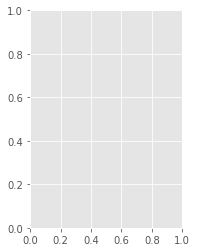

In [33]:
G = nx.petersen_graph()
plt.subplot(121)

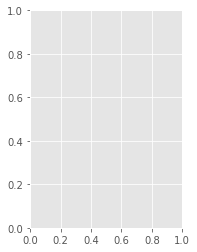

In [34]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)

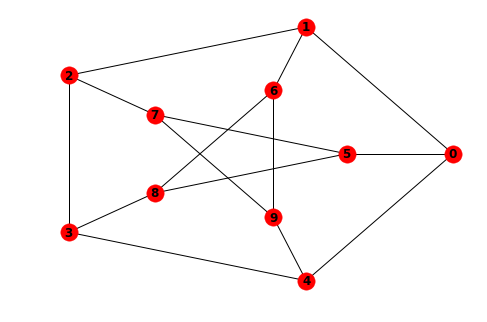

In [35]:
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

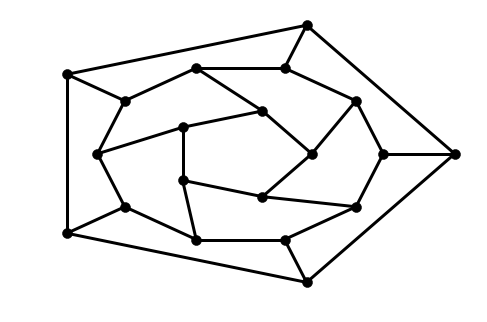

In [37]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

In [39]:
G = nx.gnm_random_graph(10, 20)   # 10 nodes and 20 edges
for v in G.nodes():   # Some properties of the graph
    print(v, G.degree(v) , nx.clustering(G,v))

0 5 0.3
1 5 0.4
2 2 0
3 4 0.16666666666666666
4 3 0.6666666666666666
5 5 0.4
6 3 0.3333333333333333
7 4 0.16666666666666666
8 4 0.5
9 5 0.5


In [40]:
list(G.adjacency())  # adjacency list of the graph

[(0, {5: {}, 6: {}, 7: {}, 8: {}, 9: {}}),
 (1, {4: {}, 5: {}, 7: {}, 8: {}, 9: {}}),
 (2, {3: {}, 6: {}}),
 (3, {2: {}, 5: {}, 7: {}, 9: {}}),
 (4, {1: {}, 5: {}, 7: {}}),
 (5, {0: {}, 1: {}, 3: {}, 4: {}, 9: {}}),
 (6, {0: {}, 2: {}, 8: {}}),
 (7, {0: {}, 1: {}, 3: {}, 4: {}}),
 (8, {0: {}, 1: {}, 6: {}, 9: {}}),
 (9, {0: {}, 1: {}, 3: {}, 5: {}, 8: {}})]

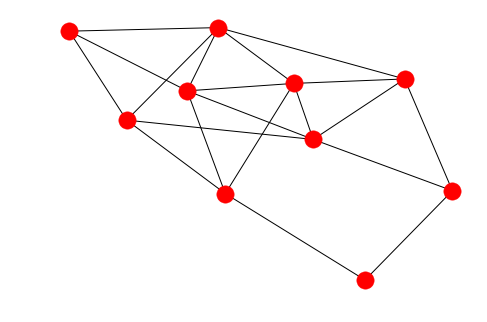

In [41]:
nx.draw(G)

In [42]:
import networkx as nx
from networkx.generators.atlas import graph_atlas_g
from networkx.algorithms.isomorphism.isomorph import graph_could_be_isomorphic as isomorphic

def atlas6():
    """ Return the atlas of all connected graphs of 6 nodes or less.
        Attempt to check for isomorphisms and remove.
    """

    Atlas = graph_atlas_g()[0:208] # 208
    # remove isolated nodes, only connected graphs are left
    U = nx.Graph() # graph for union of all graphs in atlas
    for G in Atlas:
        zerodegree = [n for n in G if G.degree(n)==0]
        for n in zerodegree:
            G.remove_node(n)
        U = nx.disjoint_union(U, G)

    # list of graphs of all connected components
    C = nx.connected_component_subgraphs(U)

    UU = nx.Graph()
    # do quick isomorphic-like check, not a true isomorphism checker
    nlist = [] # list of nonisomorphic graphs
    for G in C:
        # check against all nonisomorphic graphs so far
        if not any(isomorphic(G, H) for H in nlist):
            nlist.append(G)
            UU = nx.disjoint_union(UU, G) # union the nonisomorphic graphs
    return UU

In [43]:
G = atlas6()

print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

graph has 779 nodes with 1073 edges
137 connected components


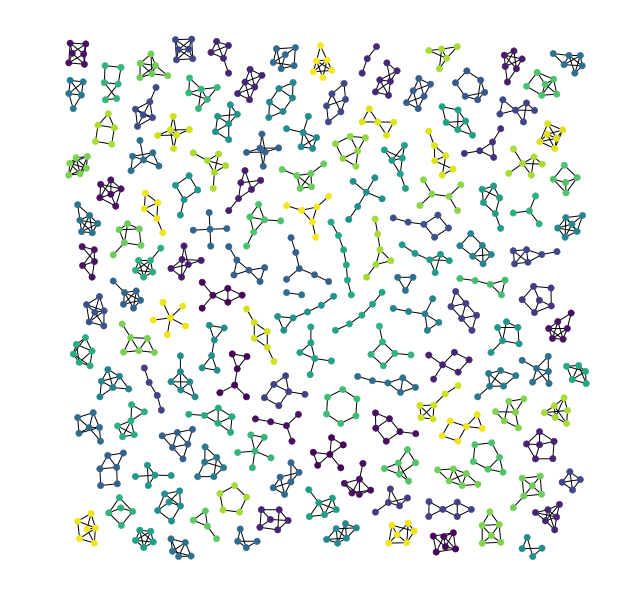

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either PyGraphviz or pydot")

plt.figure(1, figsize=(8, 8))
# layout graphs with positions using graphviz neato
pos = graphviz_layout(G, prog="neato")
# color nodes the same in each connected subgraph
C = nx.connected_component_subgraphs(G)
for g in C:
    c = [random.random()] * nx.number_of_nodes(g) # random color...
    nx.draw(g,
            pos,
            node_size=40,
            node_color=c,
            vmin=0.0,
            vmax=1.0,
            with_labels=False
            )
plt.show()

In [52]:
G = nx.Graph()
G.clear()

edges = [
    ('X', 'A', 7),
    ('X', 'B', 2),
    ('X', 'C', 3),
    ('X', 'E', 4),
    ('A', 'B', 3),
    ('A', 'D', 4),
    ('B', 'D', 4),
    ('B', 'H', 5),
    ('C', 'L', 2),
    ('D', 'F', 1),
    ('F', 'H', 3),
    ('G', 'H', 2),
    ('G', 'Y', 2),
    ('I', 'J', 6),
    ('I', 'K', 4),
    ('I', 'L', 4),
    ('J', 'L', 1),
    ('K', 'Y', 5),
]

# for edge in edges:
#     G.add_weighted_edge(*edge)
G.add_weighted_edges_from(edges)
G.nodes    

NodeView(('X', 'A', 'B', 'C', 'E', 'D', 'H', 'L', 'F', 'G', 'Y', 'I', 'J', 'K'))

In [48]:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G, 'a', 'd'))

['a', 'c', 'd']


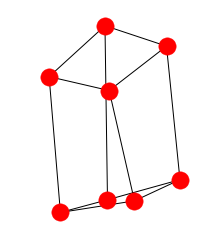

In [49]:
import matplotlib.pyplot as plt
G = nx.cubical_graph()
plt.subplot(121)
nx.draw(G)   # default spring_layout